<a href="https://colab.research.google.com/github/NimrodDev/TensorFlow/blob/main/CCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###         **Convolutional Neural Network**

*Here we simply create our first Convnet. We are going to make use of Keras and CIFAR Image Dataset which contains 60,000, 32 * 32 color images with 6000 images of each class.*  

In [2]:
# Here we just import the necessary libraries we need to used. Here we import Tensorflow, use keras from tensor and lastly matplotlib
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Here we load and split data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 [==============================] - 3s 0us/step


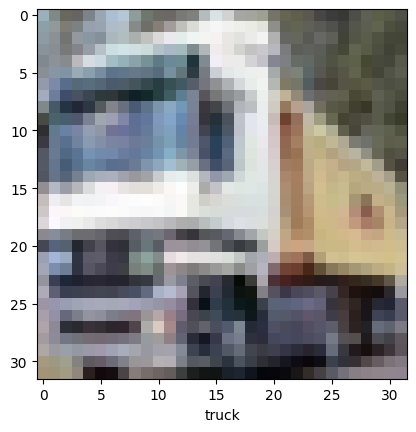

In [4]:
# Lets look at one image
IMG_INDEX = 1 # Change this look at other images

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [6]:
model.summary() # Lets have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
history = model.fit(train_images,train_labels, epochs = 10,
                    validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5493 - accuracy: 0.4332 - val_loss: 1.2853 - val_accuracy: 0.5405
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1513 - accuracy: 0.5928 - val_loss: 1.0813 - val_accuracy: 0.6168
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0084 - accuracy: 0.6457 - val_loss: 0.9656 - val_accuracy: 0.6602
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9112 - accuracy: 0.6818 - val_loss: 0.9785 - val_accuracy: 0.6548
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8486 - accuracy: 0.7031 - val_loss: 0.9305 - val_accuracy: 0.6794
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7881 - accuracy: 0.7252 - val_loss: 0.8822 - val_accuracy: 0.6943
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7478 - accuracy: 0.7388 - val_loss: 0.8682 -

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 4s - loss: 0.9214 - accuracy: 0.6962 - 4s/epoch - 12ms/step
0.6962000131607056


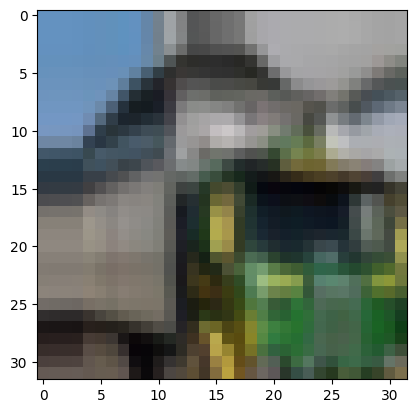

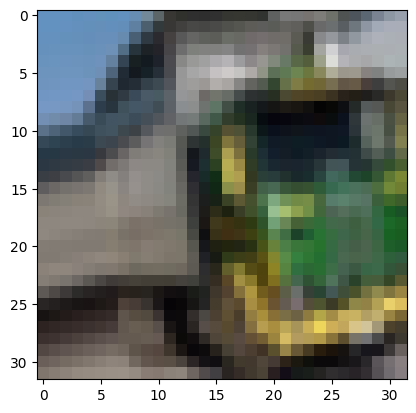

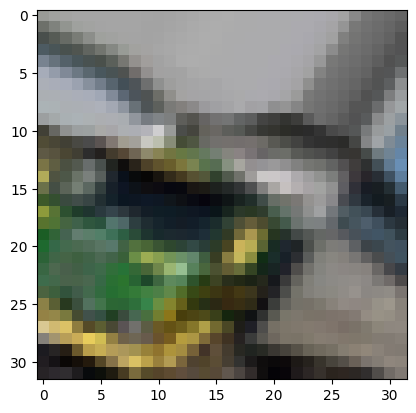

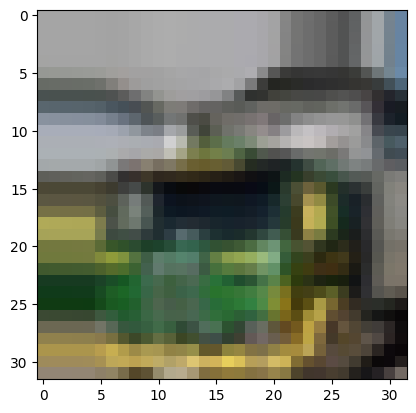

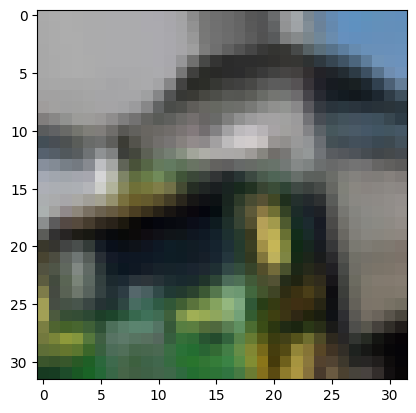

In [12]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Create a data generator object that generates images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

# Pick an image to transform
test_img = train_images[14]
img = image.img_to_array(test_img) # Converts image to numpy array
img = img.reshape((1,) + img.shape) # Reshape image

i = 0

for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'): # This loops runs forever until something will break. Saving images to the current directory
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4: # Show 4 images
      break
plt.show()